In [1]:
import pandas as pd
import numpy as np

In [2]:
dt = pd.read_csv('assignment1_dataset.csv', sep=',')
dt.head(10)

,f1,f2,f3,f4,f5,response
0,-0.764216,-1.016209,0.149410,-0.050119,-0.578127,6.242514
1,0.763880,-1.159509,-0.721492,-0.654067,-0.431670,-8.118241
2,0.519329,-0.664621,-1.694904,1.339779,0.182764,66.722455
3,-0.177388,0.515623,0.135144,-0.647634,-0.405631,-27.716793
4,0.104022,0.749665,-0.939338,-0.090725,-0.639963,8.192075
5,-0.699867,0.019159,1.103377,-0.671614,-0.119063,-18.597563
6,-1.028250,0.962967,0.471027,-1.941219,-0.465591,-73.174734
7,0.337585,1.352948,-1.789795,-0.885796,-0.846150,-25.865464
8,0.295433,-0.907789,0.275980,-0.675526,-0.942592,-9.001596
9,0.442269,-0.704559,-1.127342,1.030206,0.800113,57.076963


In [3]:
dt.describe()

,f1,f2,f3,f4,f5,response
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.012255,-0.043030,-0.065785,0.039616,0.008074,11.229435
std,0.998816,1.042413,0.982640,1.023960,1.006679,40.028188
min,-3.174809,-3.381691,-3.158010,-2.764936,-2.946633,-103.044475
25%,-0.655282,-0.759477,-0.734505,-0.660802,-0.685371,-16.580272
50%,-0.001177,-0.038444,-0.049838,-0.006831,-0.000368,10.554227
75%,0.697331,0.696343,0.591642,0.737806,0.710398,38.485118
max,3.092866,3.534175,3.406115,3.145835,3.007734,157.890314


In [4]:
corr_matrix = dt.corr()
corr_matrix['response'].sort_values(ascending=True)
# Correlation between f4 and response are the closest

f2         -0.031751
f5         -0.028999
f3          0.015218
f1          0.308474
f4          0.947255
response    1.000000
Name: response, dtype: float64

Text(0.5, 1.0, 'relationship between f4 & response')

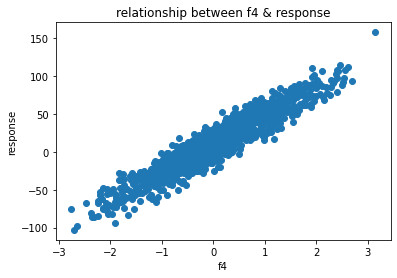

In [5]:
# let's plot f4 & response, cuz f4 corr is close to 1
from matplotlib import pyplot as plt
plt.scatter(dt.f4, dt.response)
plt.xlabel('f4')
plt.ylabel('response')
plt.title('relationship between f4 & response')

In [6]:
# Redefine each column to be processed
columns = ['f1','f2','f3','f4','f5','response']
dt = dt.loc[:, columns]
dt.head()

,f1,f2,f3,f4,f5,response
0,-0.764216,-1.016209,0.149410,-0.050119,-0.578127,6.242514
1,0.763880,-1.159509,-0.721492,-0.654067,-0.431670,-8.118241
2,0.519329,-0.664621,-1.694904,1.339779,0.182764,66.722455
3,-0.177388,0.515623,0.135144,-0.647634,-0.405631,-27.716793
4,0.104022,0.749665,-0.939338,-0.090725,-0.639963,8.192075


In [7]:
# Splitting the training and test set with the ratio of 8:2

from sklearn.model_selection import train_test_split
features = ['f1','f2','f3','f4','f5'] # Data that we want to utilize
X = dt.loc[:, features] # X are the data we want to use from 'features'
y = dt.loc[:, ['response']] # y is the data we want to use as target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, train_size=0.8)

In [8]:
alpha = 0.25 # Set learning rate to 0.25
max_epoch = 6000 # Set max iteration to 6000

-- Epoch 1
Norm: 4.02, NNZs: 5, Bias: 1.092011, T: 800, Avg. loss: 3.143195
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 6.75, NNZs: 5, Bias: 1.800649, T: 1600, Avg. loss: 2.873339
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 9.13, NNZs: 5, Bias: 2.432027, T: 2400, Avg. loss: 2.655131
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 11.31, NNZs: 5, Bias: 3.021384, T: 3200, Avg. loss: 2.460071
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 13.34, NNZs: 5, Bias: 3.562276, T: 4000, Avg. loss: 2.280027
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 15.26, NNZs: 5, Bias: 4.069822, T: 4800, Avg. loss: 2.111480
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 17.08, NNZs: 5, Bias: 4.562777, T: 5600, Avg. loss: 1.952647
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 18.82, NNZs: 5, Bias: 5.043893, T: 6400, Avg. loss: 1.802278
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 20.50, NNZs: 5, Bias: 5.497046, T: 7200, Avg. loss: 1.658644
Total training time: 0

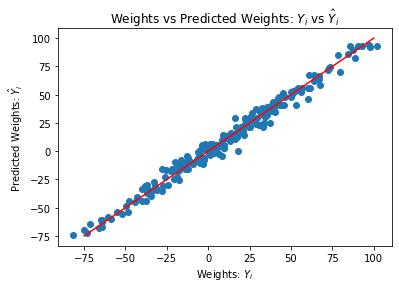

In [16]:
# Define function train model
#--------------------------------------------------------------------------------------------------------

def train_model(X, y, alpha, max_epoch):
    from sklearn.linear_model import SGDRegressor
    reg_gd = SGDRegressor(loss='huber', eta0=alpha, max_iter=max_epoch, early_stopping=False, tol=None, verbose=1, random_state=1)
    hist_loss = reg_gd.fit(X_train, y_train.values.ravel())
    w = reg_gd.predict(X_test)

    plt.scatter(y_test, w)
    plt.xlabel('Weights: $Y_i$')
    plt.ylabel('Predicted Weights: $\hat{Y}_i$')
    plt.title('Weights vs Predicted Weights: $Y_i$ vs $\hat{Y}_i$')
    # plot a line, a perfect prediction would all fall on this line
    x = np.linspace(-75, 100, 100)
    y = x
    plott = plt.plot(x, y, 'r')

    return hist_loss, w, plott;
hist_loss, w, plott = train_model(X, y, alpha, max_epoch)

In [17]:
w_list = pd.DataFrame(w, columns=['Predicted Weights'])
w_list

,Predicted Weights
0,2.824743
1,54.562976
2,6.429842
3,-45.042381
4,-10.701163
...,...
195,58.793530
196,54.429100
197,-30.811015
198,92.877653
